# Task 2 - Landsat 8 false color image

## General instructions

First, update the following cell to have a link to your Homework 4 GitHub repository

**UPDATE THIS LINK** https://github.com/oksanaprotsukha/eds220-hwk-4

Add comments for all your code and commit as needed. Err on the side of commenting and commiting too much for now.

## Overview
The goal of this task is to create a false color image showing the fire scar of the Thomas fire in 2017. 
Read more about false color images here:
[NASA Earth Observatory - Why is that Forest Red and that Cloud Blue?
How to Interpret a False-Color Satellite Image](https://earthobservatory.nasa.gov/features/FalseColor)

## About the data

In this task you will use two datsets:

**First dataset**

A simplified collection of bands (red, green, blue, near-infrared and shortwave infrared) from the Landsat Collection 2 Level-2 atmosperically corrected surface reflectance data, collected by the Landsat 8 satellite. 

Information about Landsat bands from USGS:

- [What are the band designations for the Landsat satellites?](https://www.usgs.gov/faqs/what-are-band-designations-landsat-satellites)

-[Common Landsat Band Combinations](https://www.usgs.gov/media/images/common-landsat-band-combinations)

-[How do I use a scale factor with Landsat Level-2 science products?](https://www.usgs.gov/faqs/how-do-i-use-a-scale-factor-landsat-level-2-science-products)


The data was accessed and pre-processed in the Microsoft Planetary Computer to remove data outside land and coarsen the spatial resolution ([Landsat Collection in MPC](https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2)). Data should be used for visualization purposes only. 


**Second dataset**

A shapefile of fire perimeters in California during 2017. 
The [complete file can be accessed in the CA state geoportal](https://gis.data.ca.gov/datasets/CALFIRE-Forestry::california-fire-perimeters-all-1/about).

## File management
All your data files must be  inside a directory named 'data' **in your gitignore**. 

## Data access
All data is in the Canvas-week7-homework zip file.

## FINAL CODE

You will use the next cell at the end of the task. Leave it blank for now.

In [1]:
### ===== FINAL CODE =====

## Import libraries and functions

In [27]:
# import libraries and functions
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # for creating legends

import rioxarray as rioxr
import geopandas as gpd
import xarray as xr

In [29]:
print("Xarray version:", xr.__version__)

Xarray version: 0.20.1


## Import data

In [21]:
# open NetCDF file:
fp_lsat = 'data/landsat8-2018-01-26-sb-simplified.nc'
lsat = rioxr.open_rasterio(fp_lsat)

In [4]:
calfire = gpd.read_file(os.path.join(os.getcwd(), 'data', 
                                     'California_Fire_Perimeters_2017',
                                     'California_Fire_Perimeters_2017.shp'))    
calfire.head(2)

,index,OBJECTID,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,...,GIS_ACRES,COMMENTS,COMPLEX_NA,COMPLEX_IN,IRWINID,FIRE_NUM,DECADES,SHAPE_Leng,SHAPE_Area,geometry
0,19836,41429,2017,CA,CCO,VNC,BROOK,00042450,2017-05-23,2017-05-24,...,10.043819,per walked track,None,None,None,None,2010,1246.055781,59473.666651,"POLYGON ((-13229812.974 4046876.486, -13229786..."
1,19837,41430,2017,CA,CCO,VNC,PACIFIC,00075307,2017-09-09,2017-09-09,...,1.190109,Final Walked track. Small spot to the north east,None,None,None,None,2010,561.418202,7081.369481,"POLYGON ((-13286872.985 4074523.355, -13286895..."


## Exploration 

Use the next cell(s) to perform relevant explorations of these datasets.

In [5]:
print(lsat['red'].values)
print(f'lsat CRS: {lsat.rio.crs}')

# print shape and data type
print('shape: ', lsat.rio.shape)
print('data type: ', type(lsat), '\n')
print(lsat)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]
lsat CRS: EPSG:32611
shape:  (731, 870)
data type:  <class 'xarray.core.dataset.Dataset'> 

<xarray.Dataset>
Dimensions:      (y: 731, x: 870, band: 1)
Coordinates:
  * y            (y) float64 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
  * x            (x) float64 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * band         (band) int64 1
    spatial_ref  int64 0
Data variables:
    red          (band, y, x) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    green        (band, y, x) float64 ...
    blue         (band, y, x) float64 ...
    nir08        (band, y, x) float64 ...
    swir22       (band, y, x) float64 ...


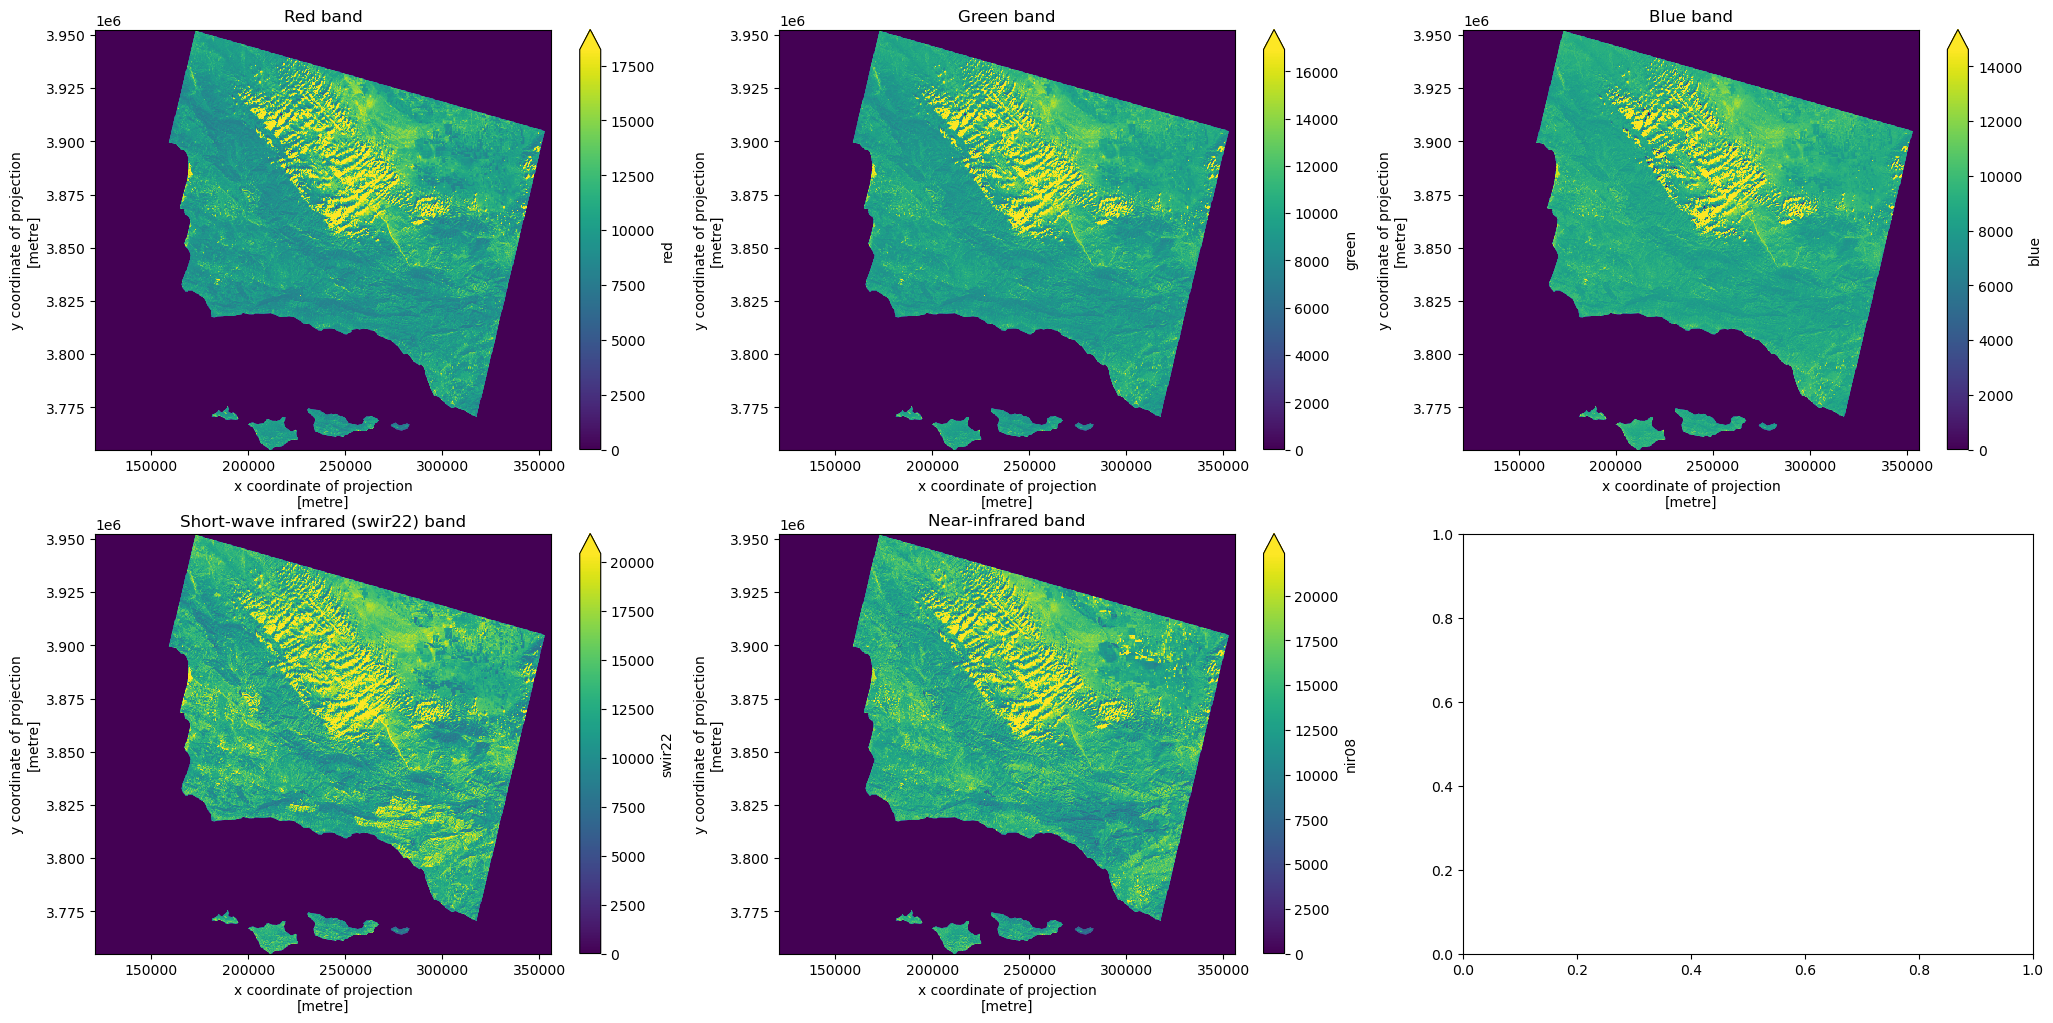

In [6]:
type(lsat)

fig, axs = plt.subplots(2, 3, figsize=(25, 12))

lsat['red'].plot(ax=axs[0, 0], robust=True)
axs[0, 0].set_title('Red band')

lsat['green'].plot(ax=axs[0, 1], robust=True)
axs[0, 1].set_title('Green band')

lsat['blue'].plot(ax=axs[0, 2], robust=True)
axs[0, 2].set_title('Blue band')

lsat['swir22'].plot(ax=axs[1, 0], robust=True)
axs[1, 0].set_title('Short-wave infrared (swir22) band')

lsat['nir08'].plot(ax=axs[1, 1], robust=True)
axs[1, 1].set_title('Near-infrared band')


plt.show()

calfire dataset shape: (608, 23)
calfire dataset crs: epsg:3857
calfire dataset geometry: 0      POLYGON ((-13229812.974 4046876.486, -13229786...
1      POLYGON ((-13286872.985 4074523.355, -13286895...
2      POLYGON ((-13244637.580 4056332.530, -13244620...
3      POLYGON ((-13229521.754 4046254.111, -13229510...
4      POLYGON ((-13229663.036 4046858.853, -13229667...
                             ...                        
603    POLYGON ((-13297381.554 4157213.882, -13297362...
604    POLYGON ((-13299295.171 4155414.960, -13299298...
605    POLYGON ((-13559512.982 4427451.985, -13559502...
606    POLYGON ((-13418484.047 5073288.061, -13418471...
607    POLYGON ((-13475752.022 5129069.810, -13475743...
Name: geometry, Length: 608, dtype: geometry


<AxesSubplot:>

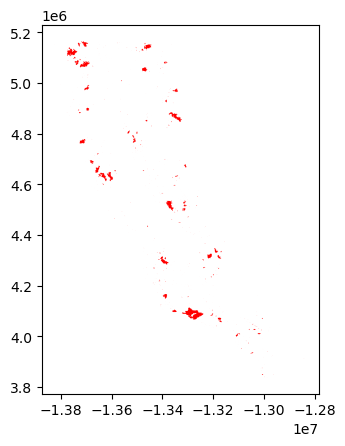

In [7]:
# explore California fire perimeter shape file

print(f'calfire dataset shape: {calfire.shape}')
print(f'calfire dataset crs: {calfire.crs}')
print(f'calfire dataset geometry: {calfire.geometry}')

calfire.plot(color = 'red')

## Updates

If there are any updates needed to the data to plot the true and false color images, perform them in the next cells (you may add as many as you need). 
Comment appropriately.

In [8]:
# drop an extra dimension "band" from lsat dataset
lsat = lsat.squeeze().drop('band')

# check that band dimension has been dropped
print(f'After squeeze:\ndimensions {lsat.dims}\ncoords: {lsat.coords}')

After squeeze:
dimensions Frozen({'y': 731, 'x': 870})
coords: Coordinates:
  * y            (y) float64 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
  * x            (x) float64 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
    spatial_ref  int64 0


## True color image

Without creating any new variables:

Select the red, green and blue variables (in that order) of the `xarray.Dataset`, convert it to a `numpy.array` using the `to_array()` method, and then use `.plot.imshow()` to create an RGB image with the data. (There will be a warning)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


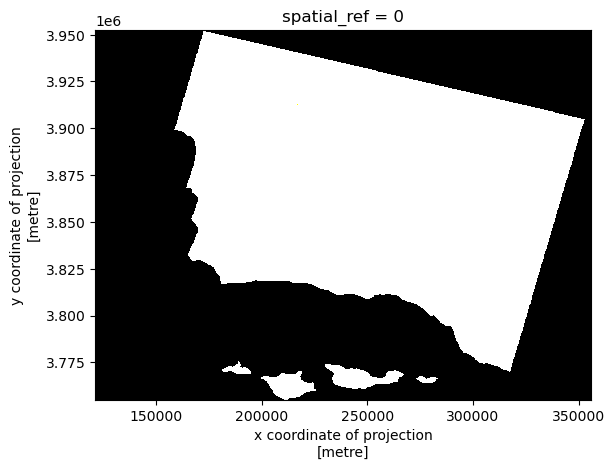

In [9]:
lsat[['red', 'green', 'blue']].to_array().plot.imshow()
plt.show()

Adjust the scale used for plotting the bands to get a true color image. 
HINT: [Check the `robust` parameter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)
The issue here is the clouds: their RGB values are outliers and cause the other values to be squished when plotting. 

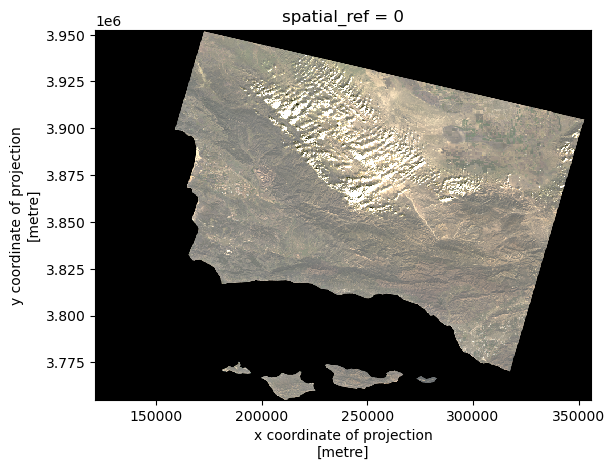

In [10]:
lsat[['red', 'green', 'blue']].to_array().plot.imshow(robust = True)
plt.show()

In [24]:
# lsat[['red','green','blue']].to_dataarray()

type(lsat[['red', 'green', 'blue']].to_array())

xarray.core.dataarray.DataArray

## False color image
Without creating any new variables:

Create a false color image by plotting the short-wave infrared (swir22), near-infrared, and red variables (in that order).

In [11]:
print(lsat)

<xarray.Dataset>
Dimensions:      (y: 731, x: 870)
Coordinates:
  * y            (y) float64 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
  * x            (x) float64 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
    spatial_ref  int64 0
Data variables:
    red          (y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    green        (y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    blue         (y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    nir08        (y, x) float64 ...
    swir22       (y, x) float64 ...


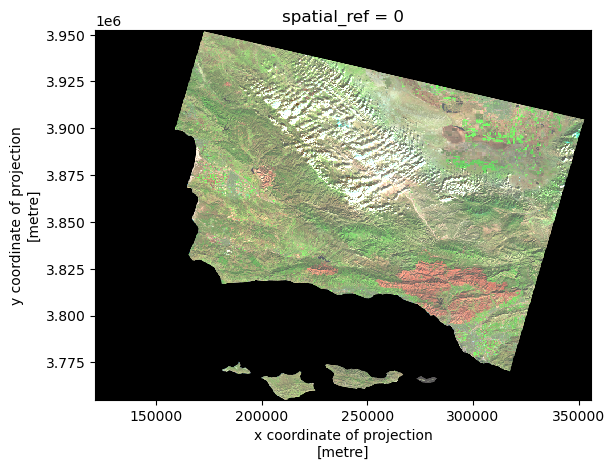

In [12]:
lsat[['swir22', 'nir08', 'red']].to_array().plot.imshow(robust = True)
plt.show()

## Updates

If there are any updates needed to the data to create the map, perform them in the next cells (you may add as many as you need). 
Comment appropriately.

In [13]:
# update CRS of the shape file to lsat CRS
calfire = calfire.to_crs(crs = lsat.rio.crs)

# check that CRS of the two datasets match
print(f'CRS of the dataset 1 and 2 match: {calfire.crs == lsat.rio.crs}')

CRS of the dataset 1 and 2 match: True


## Map

Create a map showing the shortwave infrared/nir/ ed false color image together with the Thomas fire perimeter. 
Customize it appropriately.

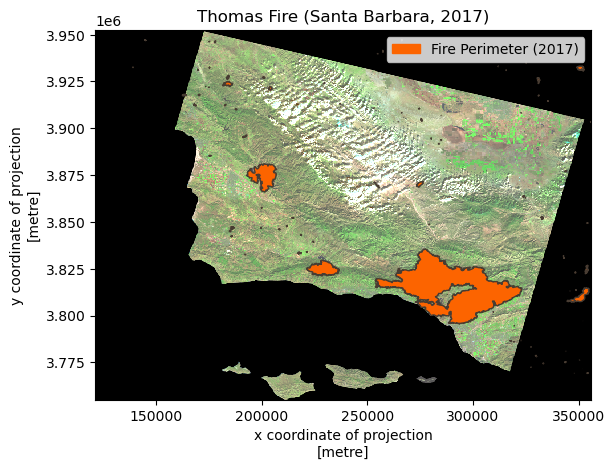

In [14]:
fig, ax = plt.subplots()

calfire.plot(ax=ax, color='#FC6400', edgecolor = '#483C32')
calfire_patch = mpatches.Patch(color='#FC6400', label='Fire Perimeter (2017)')

lsat[['swir22', 'nir08', 'red']].to_array().plot.imshow(ax=ax, robust = True)

# Add legend
ax.legend(handles=[calfire_patch], frameon=True, loc='upper right')

ax.set_title('Thomas Fire (Santa Barbara, 2017)')
plt.show()

## Final code

Collect all the relevant code into the first blank cell of the notebook titled "FINAL CODE". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The only ouput of this cell should be the plot you produced in the previous exercise. 

Add divisions for relevant sections and comment appropriately.